In [19]:
import pandas as pd
from kbdiffdi import *
from kbdiffdi.utilities import conversion
from kbdiffdi.features import feature
import csv
import datetime
import os

In [29]:
os.path.exists(os.path.dirname("C:/Users/Jacob/myfile.txt"))

'C:/Users/Jacob'

In [8]:
filename = "C:/Users/Jacob/Projects/kbdi-ffdi/kbdiffdi/data/Saasveld_Nov2016_Nov2018.xlsx"

indata = pd.read_excel(filename).values

datelist = []
out_rainfall = indata[:,4].astype(float).reshape(-1,1,1,1)
out_temp = indata[:,1].astype(float).reshape(-1,1,1,1)
out_rel_hum = indata[:,2].astype(float).reshape(-1,1,1,1)
out_wind = indata[:,3].astype(float).reshape(-1,1,1,1)
for row in indata:
    datelist.append(row[0].to_pydatetime()) # append the datetime ob
# create the featureStacks
rain = feature.RasterStack()
rain.create_sc_stack(out_rainfall, datelist, None, "standard", 0, 0, 1, -1)
temp = feature.RasterStack()
temp.create_sc_stack(out_temp, datelist, None, "standard", 0, 0, 1, -1)
relhum = feature.RasterStack()
relhum.create_sc_stack(out_rel_hum, datelist, None, "standard", 0, 0, 1, -1)
wind = feature.RasterStack()
wind.create_sc_stack(out_wind, datelist, None, "standard", 0, 0, 1, -1)
conversion.mpers_to_kmperh(wind)

kdbi:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(2016, 11, 1, 14, 0)], [0, 0, datetime.datetime(2018, 11, 14, 14, 0)]] shape: (744, 1, 1, 1)


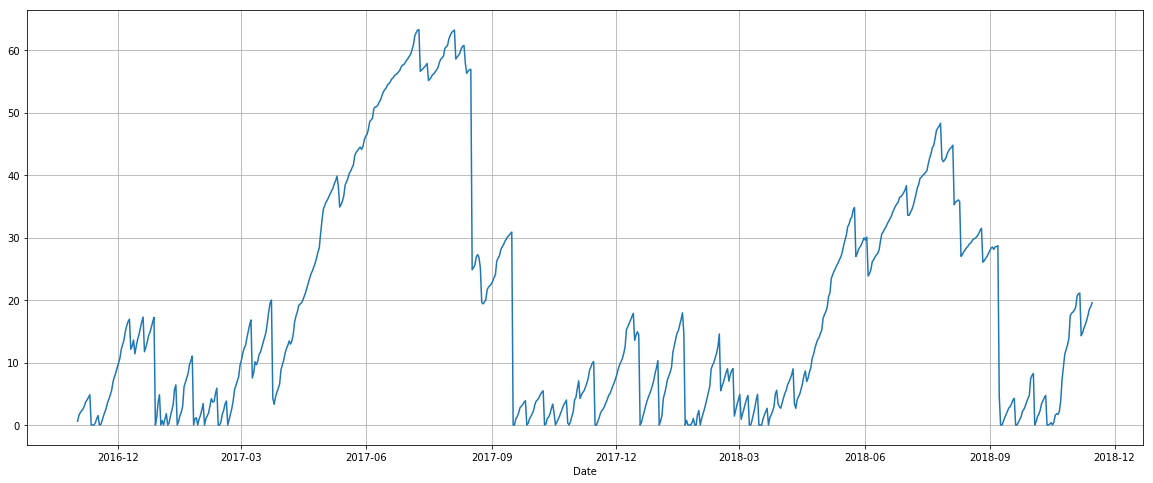

In [9]:
kbdi = indices.KBDI()
out = kbdi.fit(temp, rain)
print("kdbi:")
print(out)
plotter.timeseries(out)

In [10]:
ffdi = indices.FFDI()
out_ffdi, out_df = ffdi.fit(out, rain, temp, wind, relhum)

ffdi:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(2016, 11, 1, 14, 0)], [0, 0, datetime.datetime(2018, 11, 14, 14, 0)]] shape: (744, 1, 1, 1)


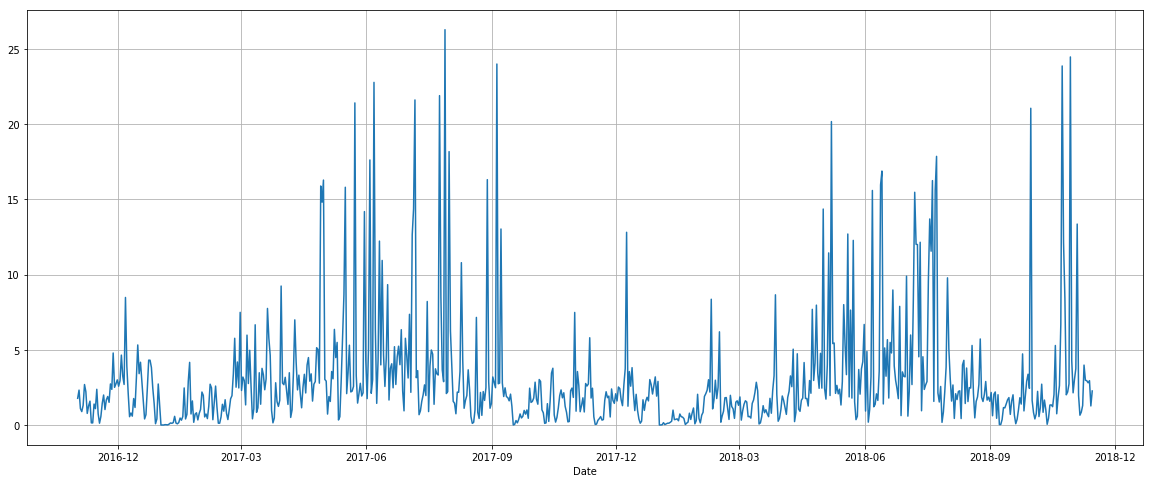


df:
<class 'kbdiffdi.features.feature.RasterStack'> mbc: [[0, 0, datetime.datetime(2016, 11, 1, 14, 0)], [0, 0, datetime.datetime(2018, 11, 14, 14, 0)]] shape: (744, 1, 1, 1)


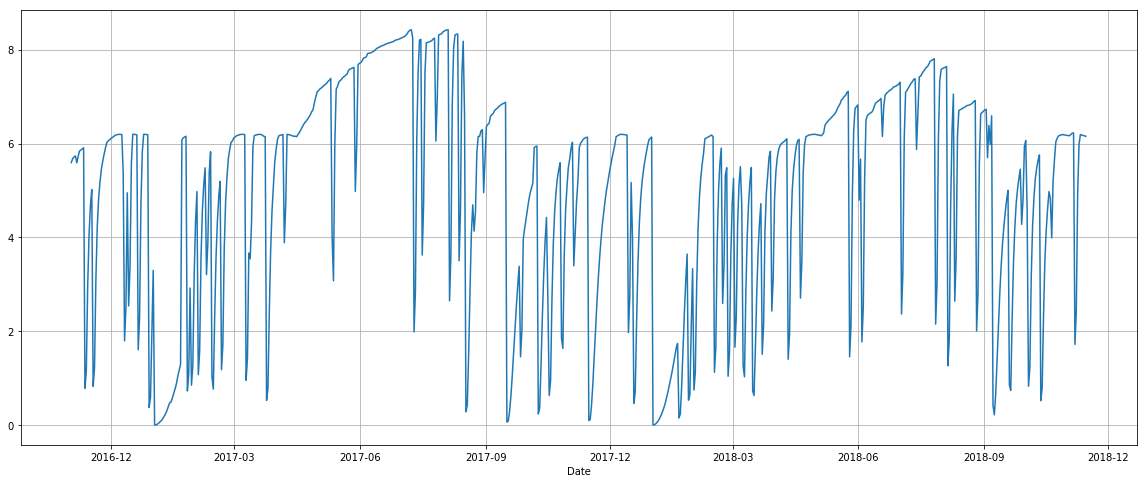

In [12]:
print("ffdi:")
print(out_ffdi)
plotter.timeseries(out_ffdi,None,None)
print()
print("df:")
print(out_df)
plotter.timeseries(out_df,None,None)

In [18]:
df_data = out_df.data.flatten().reshape(-1,1)
kbdi_data = out.data.flatten().reshape(-1,1)
ffdi_data = out_ffdi.data.flatten().reshape(-1,1)
new_data = np.concatenate((kbdi_data, df_data, ffdi_data), axis=1)
output = np.concatenate((indata, new_data), axis=1)
output

array([[Timestamp('2016-11-01 14:00:00'), 20.77, 64.34, ...,
        0.5996259399985006, 5.595228102668365, 1.7781856150937123],
       [Timestamp('2016-11-02 14:00:00'), 24.73, 59.89, ...,
        1.548214957542395, 5.676994296999983, 2.3221526345753882],
       [Timestamp('2016-11-03 14:00:00'), 18.36, 74.97, ...,
        1.982998926787852, 5.712291323031283, 1.0954266732345102],
       ...,
       [Timestamp('2018-11-12 14:00:00'), 25.83, 56.9, ...,
        18.550302439180594, 6.171222870637978, 2.9497799485693457],
       [Timestamp('2018-11-13 14:00:00'), 18.16, 72.47, ...,
        18.937582959224606, 6.1652565392587535, 1.2701411065198402],
       [Timestamp('2018-11-14 14:00:00'), 22.03, 61.45, ...,
        19.571109170236554, 6.154285123059377, 2.264891955049328]],
      dtype=object)

In [23]:
outputfilename = "C:/Users/Jacob/Projects/kbdi-ffdi/kbdiffdi/data/Saasveld_output.csv"
with open(outputfilename, "w", newline="") as outputcsv:
    writer = csv.writer(outputcsv, delimiter=",")
    writer.writerow(["TIMESTAMP","TEMP(C)", "RelHumid(%)", "WindSpeed(m/s)", "Rain_past24hours(mm)", "KBDI", "DF", "FFDI"])
    for row in output:
        writer.writerow(row)